Linear Regression Analysis - Actual vs Predicted observations


About Project - With the help of this car's data set, I want to know the relationship between the foremost specifications of the vehicle itself. we know Engine cc, BHP, and Torque are more influencing the mileage factor individually. we cannot estimate the mileage figure with engine cc or other specifications(simple regression). however, if we consider the main specifications of the vehicle as an independent variable and mileage as a dependent variable. by doing this analysis, we will be able to estimate the mileage figures

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error

In [108]:
data3=pd.read_csv('Cardetailsv3.csv')

In [109]:
data3.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [110]:
data3.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [111]:
data3.fuel.value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [112]:
fuel_mapping = {'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3}
data3['fuel'] = data3['fuel'].replace(fuel_mapping)

/var/folders/ds/6kfbb9qd0mx8352l0y59g3tr0000gn/T/ipykernel_86980/3455458588.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data3['fuel'] = data3['fuel'].replace(fuel_mapping)


In [113]:
data3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,0,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [114]:
data3.seller_type.value_counts()

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

In [115]:
seller_mapping = {'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}

data3['seller_type'] = data3['seller_type'].replace(seller_mapping)


/var/folders/ds/6kfbb9qd0mx8352l0y59g3tr0000gn/T/ipykernel_86980/1279266129.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data3['seller_type'] = data3['seller_type'].replace(seller_mapping)


In [116]:
data3.owner.value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [117]:
owner_mapping = {
    'First Owner': 0,
    'Second Owner': 1,
    'Third Owner': 2,
    'Fourth & Above Owner': 3,
    'Test Drive Car': 4
}
data3['owner'] = data3['owner'].replace(owner_mapping)


/var/folders/ds/6kfbb9qd0mx8352l0y59g3tr0000gn/T/ipykernel_86980/1484613847.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data3['owner'] = data3['owner'].replace(owner_mapping)


In [118]:
data3.transmission.value_counts()

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

In [119]:
transmission_mapping = {'Manual': 0, 'Automatic': 1}
data3['transmission'] = data3['transmission'].replace(transmission_mapping)


/var/folders/ds/6kfbb9qd0mx8352l0y59g3tr0000gn/T/ipykernel_86980/574456776.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data3['transmission'] = data3['transmission'].replace(transmission_mapping)


In [120]:
data3.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [121]:
data3=data3.dropna()

In [122]:
data3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,0,1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,0,2,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,0,0,0,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,0,0,3,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,0,0,0,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,0,0,0,0,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [123]:
data3.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [124]:
#df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'])

In [125]:
data3['torque'] = data3['torque'].str.extract(r'(\d+\.?\d*)').astype(float)

/var/folders/ds/6kfbb9qd0mx8352l0y59g3tr0000gn/T/ipykernel_86980/3767896298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['torque'] = data3['torque'].str.extract(r'(\d+\.?\d*)').astype(float)


In [126]:
data3['engine'] =data3['engine'].astype(str)

/var/folders/ds/6kfbb9qd0mx8352l0y59g3tr0000gn/T/ipykernel_86980/1795099971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['engine'] =data3['engine'].astype(str)


In [127]:
data3['engine'] = data3['engine'].str.extract(r'(\d+\.?\d*)').astype(float)

/var/folders/ds/6kfbb9qd0mx8352l0y59g3tr0000gn/T/ipykernel_86980/810091449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['engine'] = data3['engine'].str.extract(r'(\d+\.?\d*)').astype(float)


In [128]:
data3['max_power'] = data3['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)

/var/folders/ds/6kfbb9qd0mx8352l0y59g3tr0000gn/T/ipykernel_86980/4134617575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['max_power'] = data3['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)


In [129]:
data3['mileage'] = data3['mileage'].str.extract(r'(\d+\.?\d*)').astype(float)

/var/folders/ds/6kfbb9qd0mx8352l0y59g3tr0000gn/T/ipykernel_86980/667423701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['mileage'] = data3['mileage'].str.extract(r'(\d+\.?\d*)').astype(float)


In [130]:
data3

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0,0,23.40,1248.0,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,0,1,21.14,1498.0,103.52,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,0,2,17.70,1497.0,78.00,12.7,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0,0,23.00,1396.0,90.00,22.4,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0,0,16.10,1298.0,88.20,11.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,0,0,0,18.50,1197.0,82.85,113.7,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,0,0,3,16.80,1493.0,110.00,24.0,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,0,0,0,19.30,1248.0,73.90,190.0,5.0
8126,Tata Indigo CR4,2013,290000,25000,0,0,0,0,23.57,1396.0,70.00,140.0,5.0


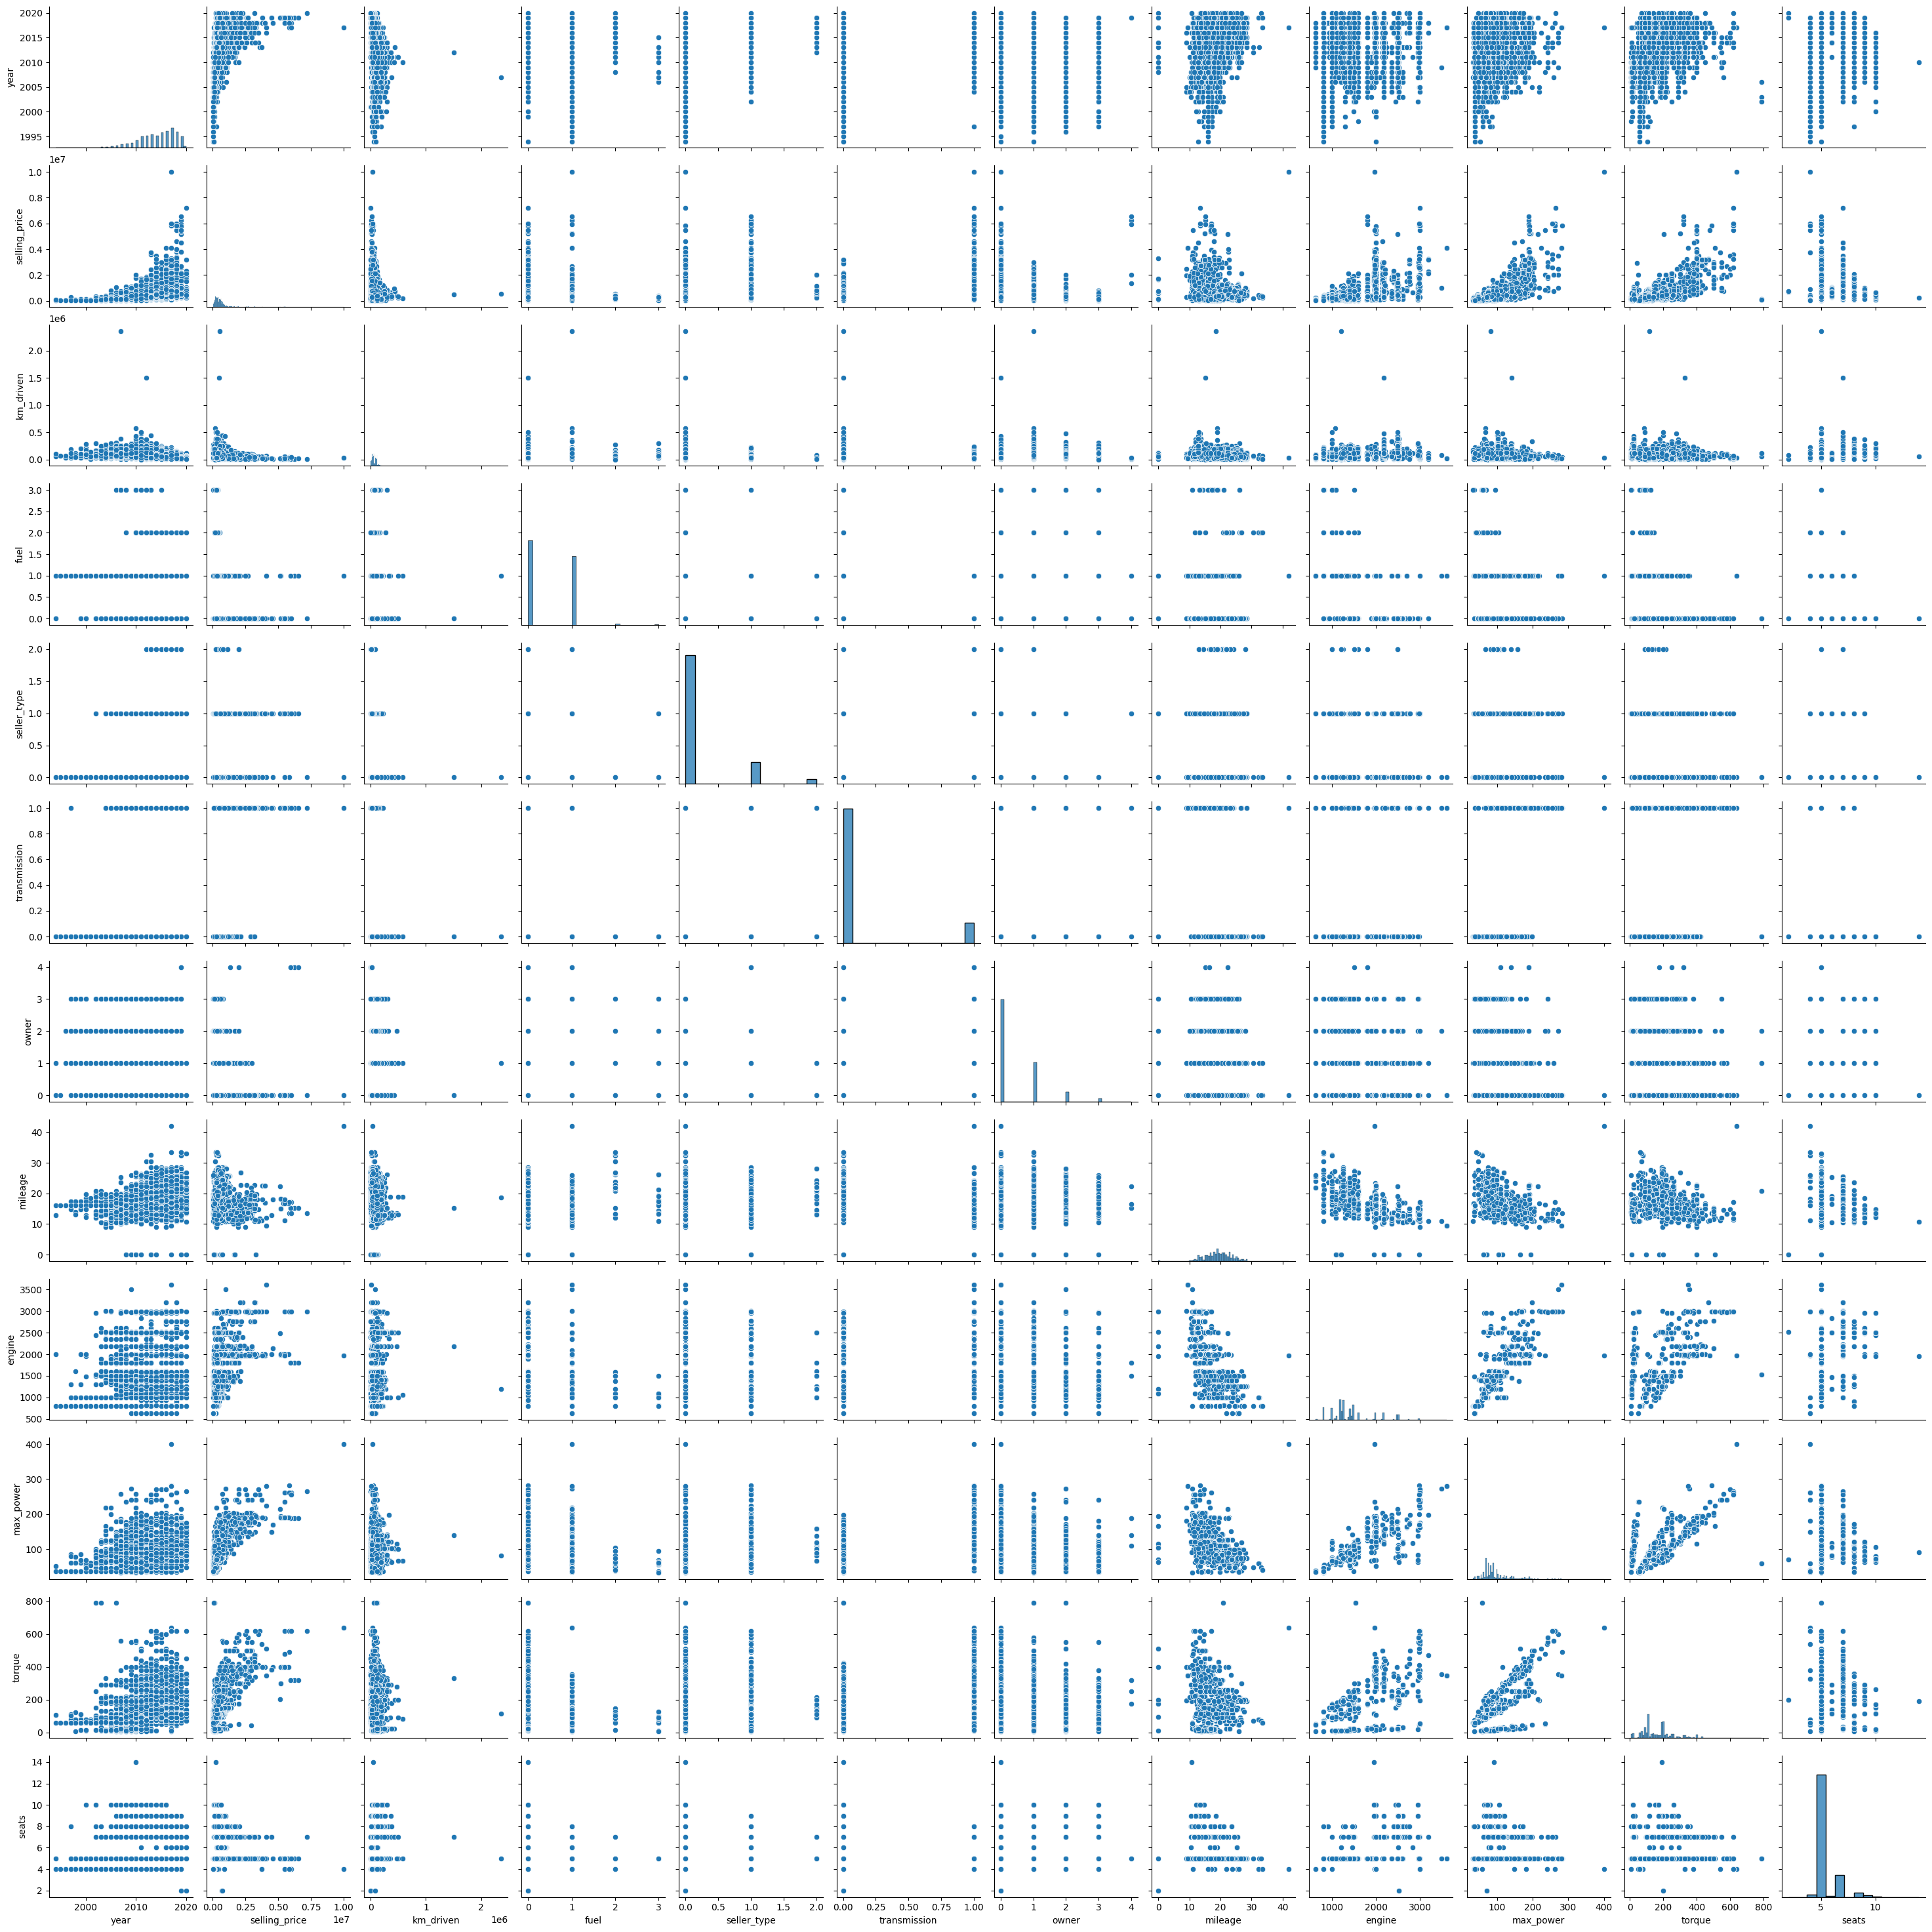

In [131]:
import seaborn as sns
sns.pairplot(data3)

In [132]:
data3.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

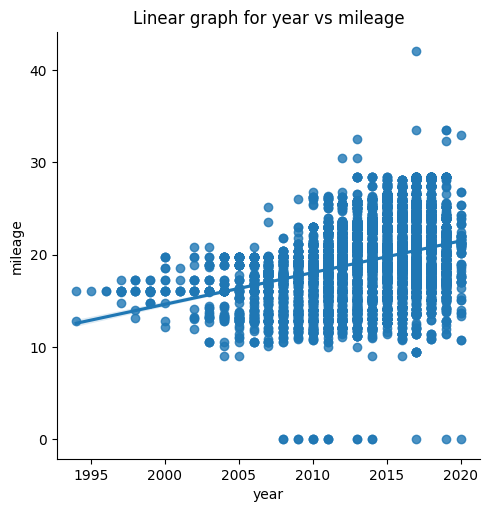

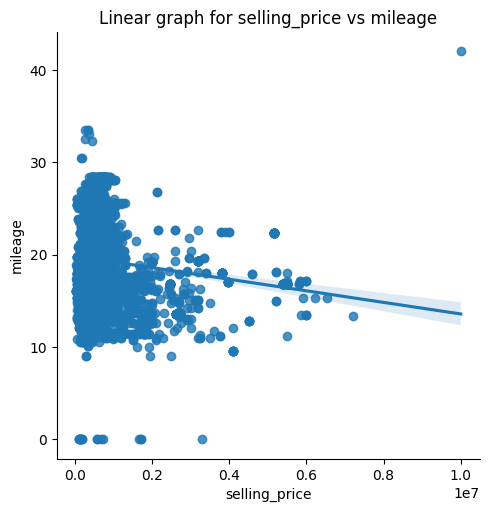

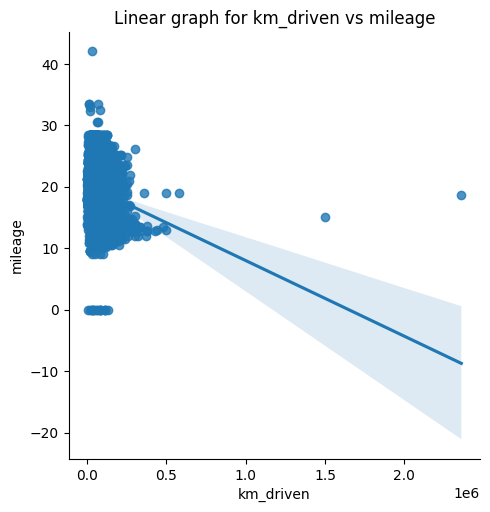

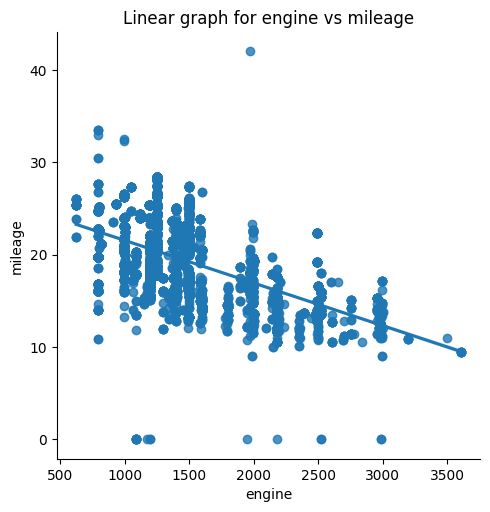

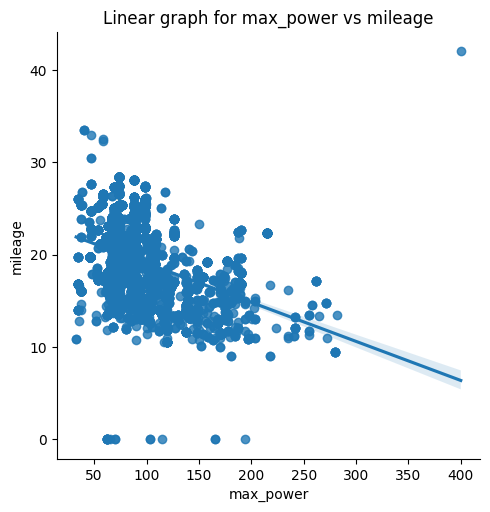

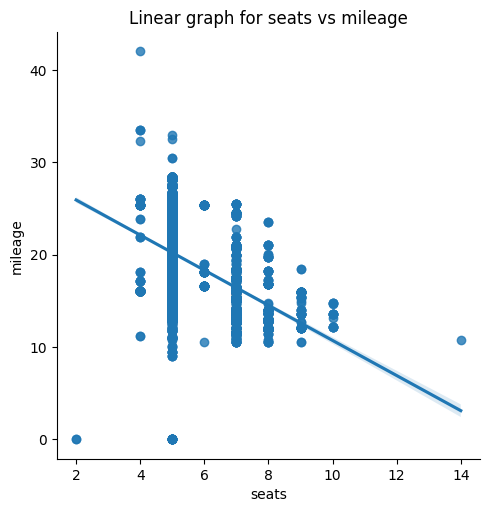

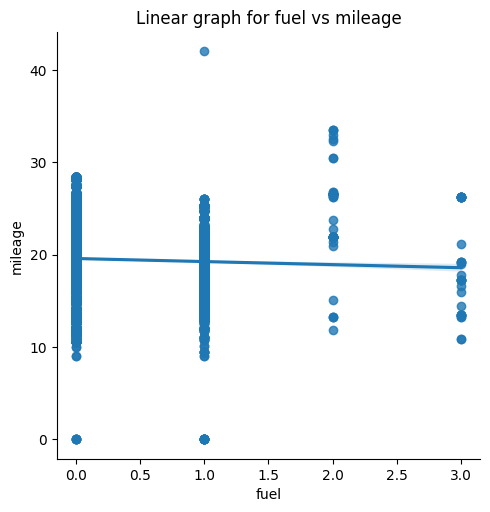

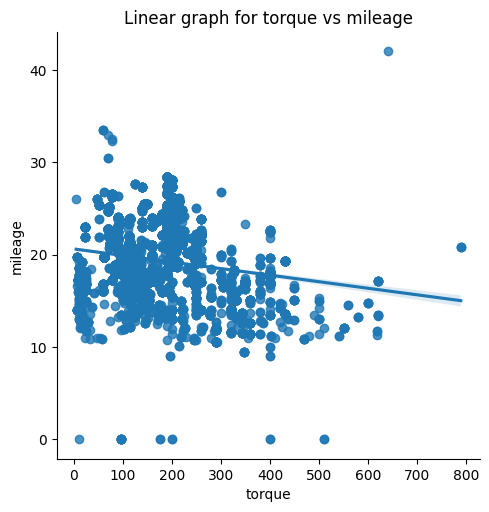

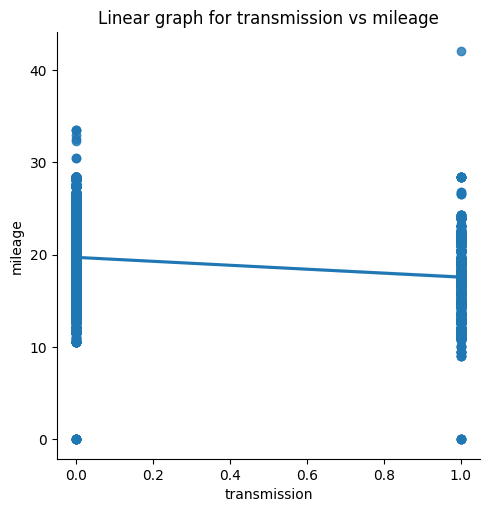

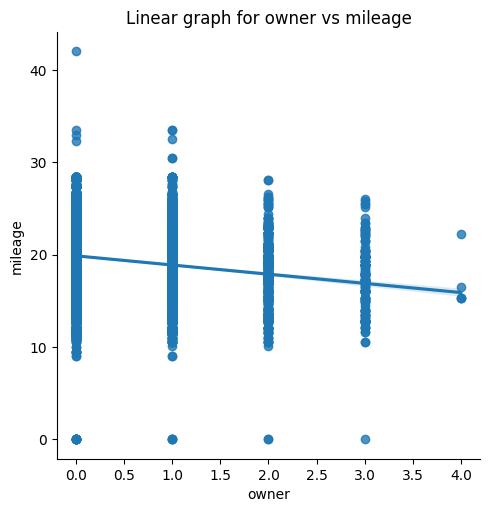

In [133]:
import matplotlib.pyplot as plt
features = ['year', 'selling_price', 'km_driven', 'engine', 'max_power', 'seats','fuel','torque','transmission', 'owner',]
for feature in features:
    sns.lmplot(x=feature, y='mileage', data=data3)
    plt.xlabel(feature)
    plt.ylabel('mileage')
    plt.title(f'Linear graph for {feature} vs mileage')
    plt.show()

In [134]:
X = data3[['year', 'selling_price', 'km_driven', 'engine', 'max_power','fuel','torque']]  
y = data3['mileage']  


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [136]:
X_train

,year,selling_price,km_driven,engine,max_power,fuel,torque
3064,2006,135000,62900,998.0,67.10,1,90.0
2522,2013,490000,95000,1461.0,83.80,0,200.0
1819,2017,325000,38000,999.0,67.00,1,91.0
6600,2015,900000,70000,2179.0,120.00,0,280.0
7909,2018,850000,9500,1497.0,108.50,0,260.0
...,...,...,...,...,...,...,...
5374,2019,711000,5000,1197.0,83.10,1,115.0
5544,2016,411000,60000,1198.0,86.80,1,109.0
888,2003,110000,90000,1495.0,94.00,1,12.5
7820,2012,900000,155000,1995.0,181.00,0,380.0


In [137]:
y_train

3064    18.90
2522    20.46
1819    23.01
6600    15.40
7909    21.50
        ...  
5374    21.40
5544    18.50
888     13.20
7820    16.07
7479    17.40
Name: mileage, Length: 6324, dtype: float64

In [138]:

model = LinearRegression()
model.fit(X_train, y_train)





LinearRegression()

In [139]:
y_pred = model.predict(X_test)
print(y_pred[0:5])

[22.2744257  22.71999147 20.9284841  20.80637572 20.68185297]


In [140]:
y_test.head(5)

3756    22.90
5692    26.59
3637    19.40
7693    21.43
3565    20.89
Name: mileage, dtype: float64

In [141]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.28884703815513


In [142]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.5825696133655126


In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np
alphas = np.logspace(-3, 3, 7)  
param_grid = {'alpha': alphas}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)


Best Alpha: 0.001


In [144]:
lasso = Lasso(alpha=0.001)  
lasso.fit(X_train, y_train)



Lasso(alpha=0.001)

In [145]:
y_pred1 = lasso.predict(X_test)

In [146]:
print(y_pred1)

[22.27224242 22.71819074 20.92655743 ... 19.85395062 18.28349393
 23.97707032]


In [147]:
print(y_test)

3756    22.90
5692    26.59
3637    19.40
7693    21.43
3565    20.89
        ...  
1359    20.54
641     14.00
1465    20.00
4414    13.60
8040    25.40
Name: mileage, Length: 1582, dtype: float64


In [148]:
print(r2_score(y_test,y_pred1))

0.5826157816962645


In [149]:
df = pd.DataFrame({'actual_y':y_test,'predicted_y':y_pred,'residuals':y_test-y_pred})

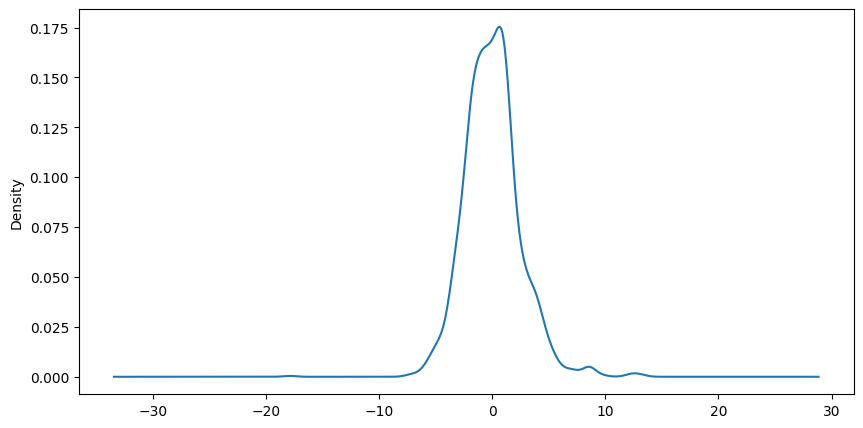

In [150]:
plt.figure(figsize=(10,5))
df.residuals.plot(kind='kde');

In [151]:
data3.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [152]:
X2=data3.drop(columns=['torque','selling_price','name'],axis=1)
y1=data3['selling_price']

In [153]:
columns_to_encode = ['fuel', 'seller_type', 'transmission', 'owner']


X2 = pd.get_dummies(X2, columns=columns_to_encode, prefix=columns_to_encode, drop_first=True)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X2, y1, test_size=0.20, random_state=42)


In [155]:
regression=LinearRegression()

In [156]:
regression.fit(X2,y1)

LinearRegression()

In [157]:
y_pred = regression.predict(X_test)


In [158]:
print(y_pred[0:5])

[ 653602.63157311  441895.16954146   99210.81521774  491265.77839297
 1071469.96152163]


In [159]:
print(y_test.head(5))

3756    501000
5692    440000
3637    140000
7693    476999
3565    620000
Name: selling_price, dtype: int64


In [160]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.6956229070995664


In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np
alphas = np.logspace(-3, 3, 7)  
param_grid = {'alpha': alphas}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)


Best Alpha: 100.0


In [162]:
lasso = Lasso(alpha=100.0)  
lasso.fit(X_train, y_train)

Lasso(alpha=100.0)

In [163]:
y_pred2 = lasso.predict(X_test)

In [164]:
print(y_pred2)

[ 650159.30517215  432124.76819833   68798.10143463 ...  177106.69955362
 2523167.15673327  627475.37621342]


In [165]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred2)
print("R-squared Score:", r2)

R-squared Score: 0.6879766204568905
